<div align="center" style="background-color:#336633;color:white;padding:10px;text-align:center;border-bottom:10px solid white;">
  <h1>MAS-RAD 2022</h1>
  <h2>Traitement et visualisation des données avec Python</h2>
  <h1 style="font-weight: 700;">PROJET : CVE DATASET</h1>
  <p style="text-align:center">Raboud Jean-Yves - Juin 2022</p>
</div>

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 style="text-transform: uppercase;font-weight: 800;color:#336633">Table des matières</h3>  
    <ul>
        <li><strong><a style="color: #336633" href="#intro">Introduction</a></strong></li>
        <li><strong><a style="color: #336633" href="#objectif_m">Objectif du module</a></strong></li>
        <li><strong><a style="color: #336633" href="#contexte">Contexte</a></strong></li>
        <li><strong><a style="color: #336633" href="#objectif_p">Objectif du projet</a></strong></li>
        <li><strong><a style="color: #336633" href="#recuperation">Récupération des données</a></strong></li>
        <li><strong><a style="color: #336633" href="#creation">Création du dataframe</a></strong></li>
        <li><strong><a style="color: #336633" href="#struct">Mise en forme des données</a></strong></li>
        <li><strong><a style="color: #336633" href="#stats">Statistique des variables quantitative</a></strong></li>
        <li><strong><a style="color: #336633" href="#nbcve">Nombre de CVE publiée par année</a></strong></li>
    </ul>
</div>



<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="intro" style="text-transform: uppercase;font-weight: 800;color:#336633">Introduction</h3>
    <p>Projet MAS-RAD du module <strong style="color:#5a5a5a">Traitement et visualisation des données avec Python</strong> .</p>
</div>

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="objectif_m" style="text-transform: uppercase;font-weight: 800;color:#336633">Objectif du module</h3>
    <p>
        <ul>
            <li>Concevoir et réaliser un pipeline complet pour le traitement de données en Python<br>
                - Acquisition, validation, reformatage & visualisation des données
            </li><br>
            <li>Utilisation des bibliothèques pour le traitement de données en Python<br>- Numpy, Pandas</li><br>
            <li>Visualisation des données avec matplotlib et plotly</li><br>
            <li>Création de notebooks Jupyter interactifs avec ipywidgets</li>
        </ul>
    </p>
</div>

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="contexte" style="text-transform: uppercase;font-weight: 800;color:#336633">Contexte</h3>
    <p>Le projet <strong style="color:#5a5a5a">CVE DATASET</strong>, est un outils permettant l'analyse des vulnérabilités de cybersécurité.<br>
    Les données analysée proviennent de la <strong><a style="color: #336633" href="http://nvd.nist.gov">National Vulnerability Database</a></strong> créee par le gouvernement américain et maintenue par l'organisme <strong><a style="color: #336633" href="https://fr.wikipedia.org/wiki/MITRE?tableofcontents=0">MITRE</a></strong>.</p>
    <p><strong style="color:#5a5a5a; text-decoration-line: underline;">CVE (Common Vulnerability Enumeration)</strong> est un standard pour le nommage des vulnérabilités.<br><br>
    Son principe est d'associer un numéro unique (de la forme "CVE-2001-xxxx") à chaque nouvelle vulnérabilité.<br>
    Chaque CVE peut être catégorisée à l'aide du standard CWE
    et sa criticité évaluée grace à un système d'évaluation nommé CVSS.
    </p>
    <p><strong style="color:#5a5a5a; text-decoration-line: underline;">CVSS (Common Vulnerability Scoring System)</strong><br><br>Permet d'associer une note (comprise de 0 à 10) pour la dangerosité d'une vulnérabilité.<br>Cette évaluation est constituée de 3 mesures appelées métriques : la métrique de base, la métrique temporelle et la métrique environnementale.</p>
    <p><strong style="color:#5a5a5a; text-decoration-line: underline;">CWE (Common Weakness Enumeration)</strong><br><br>
    CWE a pour objectif de donner un numéro (de la forme "CWE-xxx") à tous les types de faille que l'on peut trouver dans un logiciel.
    </p>
    <p style="font-style: italic;font-size: 14px;">(CWE est un système de catégorisation des types de vulnérabilité, tandis que CVE est une référence à une vulnérabilité spécifique.)</p>
    <hr style="color:#5a5a5a;opacity:0.4">
    <p>
    Les CVE de notre source de données intègrent les numéros de CWE auquel elles appartiennent, mais pas les noms des catégories,<br> de ce fait nous devons aussi récupérer <strong><a style="color: #336633" href="https://cwe.mitre.org/data/downloads.html">la liste des CWE</a></strong> auprès de l'organisme MITRE afin de pouvoir faire la relation entre les numéros et les noms.
    </p>


</div>


<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="objectif_p" style="text-transform: uppercase;font-weight: 800;color:#336633">Objectif du projet</h3>
    <p>
        <ul>
            <li>Mise en forme des données récupérées<br>- mapping des numéros de CWE avec les noms des catégories</li><br>
            <li>Afficher le nombre de CVE publiée par année sur un graphe</li><br>
            <li>Afficher les x catégories (CWE) de vulnérabilités les plus présente par année</li><br>
            <li>Afficher un wordcloud des descriptions de CVE</li>
        </ul>
    </p>
</div>

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="recuperation" style="text-transform: uppercase;font-weight: 800;color:#336633">Récupération des données</h3>
    <p>Exécuter la cellule ci-dessous uniquement si les données ne sont pas présente dans le répertoire <i>cve_dataset</i></p>
</div>

In [1]:

# For Download all cve dataset from nvd.nist.gov
# import requests
# from datetime import datetime

# url = 'https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-{}.json.gz'

# for cve in range(2002, datetime.now().year+1):
#     data = requests.get(url.format(cve)).content
#     with open(f'cve_dataset/nvdcve-1.1-{cve}.json.gz','wb') as f:
#         f.write(data)

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="creation" style="text-transform: uppercase;font-weight: 800;color:#336633">Création du dataframe</h3>
    <p></p>
</div>

In [2]:
import json
from glob import glob
import gzip
import pandas as pd
from pandas import json_normalize
import xml.etree.ElementTree as et
import IPython as IPy
import matplotlib.pyplot as plt
import re
import ipywidgets as ipw

pd.options.display.max_columns = None

In [3]:
# Extract gzip data and create CVE dataframe
cve_dataset = []
for data in glob('cve_dataset/*.json.gz'):
# 🖥️ for testing only extract only *2020.json.gz
# for data in glob('cve_dataset/*2020.json.gz'):
    with open(data,'rb') as f:
        json_data = json.loads(gzip.decompress(f.read()))

        cve_items = json_normalize(json_data['CVE_Items'])
        cve_items.drop(['cve.data_type','cve.data_format','cve.data_version','cve.references.reference_data','configurations.CVE_data_version','configurations.nodes','cve.description.description_data'],
            axis=1,
            inplace=True
        )

        descriptions = json_normalize(
            json_data['CVE_Items'],
            record_path=[['cve','description','description_data']],
            meta=[['cve','CVE_data_meta','ID']]
        )
        descriptions.drop(['lang'],axis=1,inplace=True)

        dataframe = cve_items.merge(descriptions,on='cve.CVE_data_meta.ID')

        dataframe.rename(
            columns={
                "cve.CVE_data_meta.ID":"ID",
                "cve.problemtype.problemtype_data":"cwe_ids",
                "cve.CVE_data_meta.ASSIGNER":"assigner",
                "value":"description"
            },
            inplace=True
        )

        dataframe = dataframe.set_index("ID")
        cve_dataset.append(dataframe)

CVE_df = pd.concat(cve_dataset)
CVE_df.insert(2, "cwe_names", None)
# Drop row where description = '** REJECT ** DO NOT USE THIS CANDIDATE NUMBER'
CVE_df.drop(CVE_df[CVE_df['description'].str.startswith('** REJECT **')].index, inplace=True)
CVE_df= CVE_df[sorted(CVE_df)]

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="struct" style="text-transform: uppercase;font-weight: 800;color:#336633">Mise en forme des données</h3>
    <p>1. Extraction des CWE id se trouvant dans la structure json <i>"cve.problemtype.problemtype_data" pour la création de la colonne "cwe_ids" du dataframe.</i>
    <p>2. Mapping des CWE id avec les noms correspondant du fichier cwec_v4.7.xml pour la création de la colonne "CWE_NAME" du dataframe.</p>
    <p align="center"><img src="medias/cwe_mapping.png" width="60%" style="padding-top:10px;"></p>
</div>

In [4]:
# 1. Extract CWE ids
CVE_df['cwe_ids'] = \
CVE_df['cwe_ids'].map(lambda x: [id['value'] for sublist in x for id in sublist['description']])

In [5]:
# 2. Use Common Weakness Enumeration (CWE) for CVE type categorisation
cwe_dataset = dict()
tree = et.parse('cve_dataset/cwec_v4.7.xml')
root = tree.getroot()

for weakness in root.iter('{http://cwe.mitre.org/cwe-6}Weakness'):
    cwe_dataset[weakness.get('ID')] = weakness.get('Name')

for category in root.iter('{http://cwe.mitre.org/cwe-6}Category'):
    cwe_dataset[category.get('ID')] = category.get('Name')

CWE_df = pd.DataFrame.from_dict(cwe_dataset, orient='index', columns=["CWE_NAME"])

# mapping cwe_id with cwe_name
def categorise(row):
    cwe_names = []
    for id in row['cwe_ids']:
        try:
            cwe_names.append(CWE_df.loc[id.split("-",1)[1]]['CWE_NAME'])
        except:
            cwe_names.append(id)

    return cwe_names

CVE_df['cwe_names'] = CVE_df.apply(lambda row: categorise(row), axis=1)

In [6]:
# need to use .astype(str) , because column cwe_ids and cwe_names are lists
# CVE_df.astype(str).duplicated(keep='last').sum()
CVE_df.astype(str).drop_duplicates(inplace=True)

## cast date
CVE_df['publishedDate'] = pd.to_datetime(CVE_df['publishedDate'])
CVE_df['lastModifiedDate'] = pd.to_datetime(CVE_df['lastModifiedDate'])

<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="stats" style="text-transform: uppercase;font-weight: 800;color:#336633">Statistique des variables quantitative</h3>
    <p></p>
</div>

In [8]:
# displays statistics for quantitative variables
CVE_df.describe()

,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore
count,18076.000000,18076.000000,18076.000000,18076.000000,18076.000000,18076.000000
mean,5.504608,7.718771,5.149474,7.135694,2.656611,4.334366
std,1.897725,2.222529,2.460727,1.690531,0.962631,1.536305
min,1.200000,1.900000,2.900000,2.000000,0.200000,1.400000
25%,4.300000,6.800000,2.900000,5.500000,1.800000,3.600000
50%,5.000000,8.600000,4.900000,7.500000,2.800000,3.600000
75%,6.800000,10.000000,6.400000,8.600000,3.900000,5.900000
max,10.000000,10.000000,10.000000,10.000000,3.900000,6.000000


<div style="background-color:white;color:black;padding:20px;border-bottom:6px solid #336633;">
    <h3 id="nbcve" style="text-transform: uppercase;font-weight: 800;color:#336633">Nombre de CVE publiée par année</h3>
    <p></p>
</div>

<AxesSubplot:>

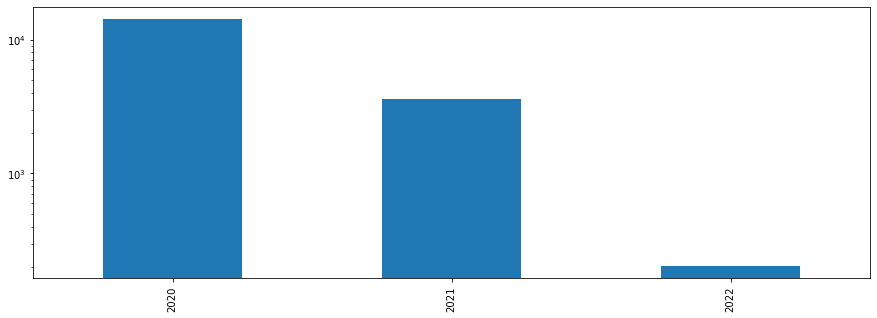

In [7]:
# display all published cve by year
years = CVE_df['publishedDate'].dt.year
years.value_counts().sort_index().plot(kind='bar',figsize=(15, 5),logy=True)

### Liens utile:
- [CVE dataset](https://nvd.nist.gov/vuln/data-feeds)

- [CWE dataset](https://cwe.mitre.org/data/downloads.html)

- [Standards pour la gestion des vulnérabilités](https://www.cert-ist.com/public/fr/SO_detail?code=standards_gestion_vulnerabilites)

- [CPE descriptif (pas utilisé dans le projet)](https://medium.com/prohacktive/comment-exploiter-la-base-cve-du-nist-dfb10837da5c)